In [55]:
import os
import caveclient
import platform
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
%matplotlib inline

platstring = platform.platform()

# if we are on code ocean, the CAVEsetup helped you make your token an environment variable
if 'amzn' in platstring:
    client= caveclient.CAVEclient('minnie65_public', auth_token=os.environ['API_SECRET'])
else:
    # otherwise if you are local, then it should be saved to a file in your harddrive 
    # that the caveclient knows where to read.
    client= caveclient.CAVEclient('minnie65_public')

In [18]:
# Show the description of the datastack
client.info.get_datastack_info()['description']

'This is the publicly released version of the minnie65 volume and segmentation. '

In [19]:
client.materialize.get_tables()

['synapses_pni_2',
 'baylor_gnn_cell_type_fine_model_v2',
 'nucleus_alternative_points',
 'connectivity_groups_v507',
 'proofreading_status_public_release',
 'allen_column_mtypes_v1',
 'allen_v1_column_types_slanted_ref',
 'aibs_column_nonneuronal_ref',
 'nucleus_ref_neuron_svm',
 'aibs_soma_nuc_exc_mtype_preds_v117',
 'baylor_log_reg_cell_type_coarse_v1',
 'apl_functional_coreg_forward_v5',
 'nucleus_detection_v0',
 'aibs_soma_nuc_metamodel_preds_v117',
 'coregistration_manual_v3']

In [ ]:
# client.materialize.get_table_metadata('synapses_pni_2')
# cell_type_df = client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117')
syn_df = client.materialize.query_table('synapses_pni_2')

In [20]:
client.materialize.get_table_metadata('aibs_soma_nuc_metamodel_preds_v117')

{'valid': True,
 'schema': 'cell_type_reference',
 'id': 14622,
 'table_name': 'aibs_soma_nuc_metamodel_preds_v117',
 'aligned_volume': 'minnie65_phase3',
 'created': '2022-07-26T23:44:26.638883',
 'schema_type': 'cell_type_reference',
 'user_id': '1077',
 'description': 'This table contains cell-type predictions for cells throughout the entire dataset, based on a soma and nucleus feature trained metamodel (Elabbady 2022 https://doi.org/10.1101/2022.07.20.499976). This is a reference table where id refers to the unique nucleus id in the "nucleus_detection_v0" table. Classification_system refers to the coarse predictions and cell_type denotes noneuronal class and neuronal subclass predictions. Errors and soma-soma mergers have been filtered out. For questions please contact Leila Elabbady or Forrest Collman.[Note: This table "aibs_soma_nuc_metamodel_preds_v117" will update the "target_id" foreign_key when updates are made to the "nucleus_detection_v0" table] [Note: This table \'aibs_som

In [21]:
cell_type_df = client.materialize.query_table('aibs_soma_nuc_metamodel_preds_v117')
cell_type_df.head()

,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,id,created,valid,target_id,classification_system,cell_type,pt_position,bb_start_position,bb_end_position
0,498173,2020-09-28 22:43:20.177696+00:00,t,308.176159,103884538719281829,864691135373830344,553,2022-07-26 23:54:55.895294+00:00,t,498173,aibs_neuronal,6P-IT,"[284688, 211936, 15566]","[nan, nan, nan]","[nan, nan, nan]"
1,487329,2020-09-28 22:41:27.945151+00:00,t,295.937638,105279407463397326,864691135975935434,4509,2022-07-27 00:00:10.165062+00:00,t,487329,aibs_neuronal,MC,"[294544, 118624, 21745]","[nan, nan, nan]","[nan, nan, nan]"
2,106662,2020-09-28 22:42:56.452281+00:00,t,230.148178,79524515478544304,864691136084076652,4693,2022-07-27 00:00:10.313814+00:00,t,106662,aibs_neuronal,23P,"[107056, 119248, 19414]","[nan, nan, nan]","[nan, nan, nan]"
3,271350,2020-09-28 22:41:38.906480+00:00,t,305.328128,87351114324194368,864691135777995965,5061,2022-07-27 00:00:10.592207+00:00,t,271350,aibs_neuronal,6P-CT,"[163920, 235968, 20875]","[nan, nan, nan]","[nan, nan, nan]"
4,456040,2020-09-28 22:42:07.860678+00:00,t,257.463910,101129507251445952,864691136084057196,8652,2022-07-27 00:01:29.589487+00:00,t,456040,aibs_neuronal,MC,"[264544, 132528, 23988]","[nan, nan, nan]","[nan, nan, nan]"


In [22]:
cell_types = np.unique(cell_type_df[['cell_type']])
print(cell_types)

    # 10. **BC**: Basket cell (generally soma-targeting inhibitory neuron)
    # 11. **BPC**: Bipolar (or multipolar) inhibitory cell based on dendritic morphology
    # 12. **MC**: Martinotti (or non-Martinotti) SST-like inhibitory cell

['23P' '4P' '5P-ET' '5P-IT' '5P-NP' '6P-CT' '6P-IT' 'BC' 'BPC' 'MC' 'NGC'
 'OPC' 'astrocyte' 'microglia' 'oligo' 'pericyte']


In [23]:
inh_df = cell_type_df[ (cell_type_df['cell_type'] == 'BC') | (cell_type_df['cell_type'] == 'BPC') | (cell_type_df['cell_type'] == 'MC')]
inh_df

,id_ref,created_ref,valid_ref,volume,pt_supervoxel_id,pt_root_id,id,created,valid,target_id,classification_system,cell_type,pt_position,bb_start_position,bb_end_position
1,487329,2020-09-28 22:41:27.945151+00:00,t,295.937638,105279407463397326,864691135975935434,4509,2022-07-27 00:00:10.165062+00:00,t,487329,aibs_neuronal,MC,"[294544, 118624, 21745]","[nan, nan, nan]","[nan, nan, nan]"
4,456040,2020-09-28 22:42:07.860678+00:00,t,257.463910,101129507251445952,864691136084057196,8652,2022-07-27 00:01:29.589487+00:00,t,456040,aibs_neuronal,MC,"[264544, 132528, 23988]","[nan, nan, nan]","[nan, nan, nan]"
20,399122,2020-09-28 22:41:24.315003+00:00,t,320.290488,98181578735735352,864691136057341656,36525,2022-07-27 00:05:21.489956+00:00,t,399122,aibs_neuronal,BC,"[243056, 189008, 20886]","[nan, nan, nan]","[nan, nan, nan]"
30,324989,2020-09-28 22:41:26.048285+00:00,t,211.693240,93737765791143715,864691135937151748,63851,2022-07-27 00:08:04.305467+00:00,t,324989,aibs_neuronal,BPC,"[210608, 110272, 26372]","[nan, nan, nan]","[nan, nan, nan]"
101,36703,2020-09-28 22:44:26.692428+00:00,t,252.318679,74818605979781236,864691136717616750,63,2022-07-26 23:54:55.522051+00:00,t,36703,aibs_neuronal,BPC,"[72928, 184704, 21210]","[nan, nan, nan]","[nan, nan, nan]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86869,555467,2020-09-28 22:41:12.647994+00:00,t,289.153024,108025575796784346,864691136119405848,86870,2022-07-27 00:10:57.423884+00:00,t,555467,aibs_neuronal,BPC,"[314864, 131936, 26449]","[nan, nan, nan]","[nan, nan, nan]"
86877,267192,2020-09-28 22:44:13.943402+00:00,t,232.064614,88753747697717397,864691135194735914,86878,2022-07-27 00:10:57.429859+00:00,t,267192,aibs_neuronal,MC,"[174432, 200608, 21567]","[nan, nan, nan]","[nan, nan, nan]"
86879,641865,2020-09-28 22:44:54.049292+00:00,t,295.618150,115550564120983968,864691135955403523,86880,2022-07-27 00:10:57.431253+00:00,t,641865,aibs_neuronal,BC,"[369328, 98848, 22365]","[nan, nan, nan]","[nan, nan, nan]"
86893,562856,2020-09-28 22:41:16.409500+00:00,t,295.122371,108949714849871874,864691136389594384,86894,2022-07-27 00:10:57.441329+00:00,t,562856,aibs_neuronal,MC,"[321296, 201904, 22597]","[nan, nan, nan]","[nan, nan, nan]"


In [24]:
np.unique(inh_df[['cell_type']])

array(['BC', 'BPC', 'MC'], dtype=object)

In [25]:
inh_df.columns

Index(['id_ref', 'created_ref', 'valid_ref', 'volume', 'pt_supervoxel_id',
       'pt_root_id', 'id', 'created', 'valid', 'target_id',
       'classification_system', 'cell_type', 'pt_position',
       'bb_start_position', 'bb_end_position'],
      dtype='object')

In [26]:
pre_ids = np.unique(inh_df[['id']])
len(pre_ids)

6778

In [27]:
post_ids = np.unique(inh_df[['target_id']])
len(post_ids)

6776

In [28]:
overlap = []
for i in range(len(pre_ids)):
    for j in range(len(post_ids)):
        if pre_ids[i] == post_ids[j]:
            overlap.append(pre_ids[i])
print(len(overlap))

24


In [29]:
path = '../data/Schneider-Mizell2023_data/inhibitory_synapses_onto_column.csv'
inh_inh_df = pd.read_csv(path)

In [30]:
inh_inh_df.columns

Index(['Unnamed: 0', 'synapse_id', 'pre_soma_id', 'post_soma_id',
       'pre_pt_root_id', 'post_pt_root_id', 'ctr_pt_position_um_x',
       'ctr_pt_position_um_y', 'ctr_pt_position_um_z', 'ctr_pt_position_x',
       'ctr_pt_position_y', 'ctr_pt_position_z', 'pre_pt_position_x',
       'pre_pt_position_y', 'pre_pt_position_z', 'post_pt_position_x',
       'post_pt_position_y', 'post_pt_position_z', 'synapse_size',
       'dist_to_root', 'is_apical', 'is_soma', 'is_dendrite', 'is_proximal',
       'syn_depth_um', 'soma_depth_um', 'valence', 'syn_in_conn',
       'is_multisyn', 'syn_clump_comp', 'syn_in_clump', 'is_clumped',
       'clump_in_conn'],
      dtype='object')

In [62]:
inh_inh_df.shape

(77297, 33)

In [32]:
pre_ids = np.unique(inh_inh_df[['pre_soma_id']])
len(pre_ids)

163

In [33]:
post_ids = np.unique(inh_inh_df[['post_soma_id']]) # filter this to be inh cells
len(post_ids)

1345

In [34]:
overlap = []
for i in range(len(pre_ids)):
    for j in range(len(post_ids)):
        if pre_ids[i] == post_ids[j]:
            overlap.append(pre_ids[i])
print(len(overlap))

162


In [65]:
inh_inh_df

,Unnamed: 0,synapse_id,pre_soma_id,post_soma_id,pre_pt_root_id,post_pt_root_id,ctr_pt_position_um_x,ctr_pt_position_um_y,ctr_pt_position_um_z,ctr_pt_position_x,...,is_proximal,syn_depth_um,soma_depth_um,valence,syn_in_conn,is_multisyn,syn_clump_comp,syn_in_clump,is_clumped,clump_in_conn
0,0,144720420,269505,267006,864691135538472562,864691135969342309,605.080511,479.665809,839.60,169540,...,True,479.665809,485.740429,Inh,1,False,0,1,False,1
1,1,156001467,262642,267006,864691136008567724,864691135969342309,619.434679,564.989540,907.16,174974,...,False,564.989540,485.740429,Inh,1,False,20,1,False,1
2,2,162086367,267293,267006,864691135502190941,864691135969342309,642.446401,453.876324,902.36,178284,...,False,453.876324,485.740429,Inh,1,False,222,1,False,1
3,3,125903283,301030,267006,864691135428878640,864691135969342309,558.406611,472.325980,933.08,157756,...,False,472.325980,485.740429,Inh,1,False,2,1,False,1
4,4,147430298,264898,267006,864691135472325170,864691135969342309,609.436916,461.998265,897.68,170240,...,False,461.998265,485.740429,Inh,7,True,5,4,True,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77292,77292,198173599,309508,346889,864691135730563769,864691135941436020,706.217739,666.178236,933.44,198792,...,False,666.178236,723.686910,Exc,2,True,104,1,False,2
77293,77293,239553348,309508,347168,864691135730563769,864691135272402193,798.828518,695.248418,1062.24,222490,...,False,695.248418,761.310476,Exc,1,False,50,1,False,1
77294,77294,204237486,309480,347168,864691135082074103,864691135272402193,720.876646,667.565121,1023.12,202473,...,False,667.565121,761.310476,Exc,1,False,4,1,False,1
77295,77295,183614692,309480,312038,864691135082074103,864691135560849377,670.205068,633.450987,931.72,189110,...,False,633.450987,754.142816,Exc,1,False,57,1,False,1


In [67]:
only_inh_df = inh_inh_df[inh_inh_df['valence'] == 'Inh']
only_inh_df.shape

(8770, 33)

In [68]:
pre_ids = np.unique(only_inh_df[['pre_soma_id']])
print(len(pre_ids))
post_ids = np.unique(only_inh_df[['post_soma_id']]) # filter this to be inh cells
print(len(post_ids))

# overlap = []
# for i in range(len(pre_ids)):
#     if pre_ids[i] not in post_ids:
#         print(pre_ids[i])
#     # for j in range(len(post_ids)):
#     #     if pre_ids[i] != post_ids[j]:
#     #         print(f'preID = {pre_ids[i]}')
            
# print(len(overlap))

163
163


In [55]:
print(pre_ids)

[252232 255120 255129 255137 255208 255218 256424 256426 256446 256514
 256543 256622 258234 258249 258281 258292 258293 258362 258365 258379
 260468 260505 260519 260541 260609 260620 260622 260707 260718 260724
 260803 262555 262642 262678 262692 262779 262805 262898 262909 262957
 264649 264783 264786 264792 264824 264848 264849 264891 264898 264920
 264932 265035 265036 266850 267006 267010 267015 267068 267192 267293
 267317 269334 269414 269485 269505 269585 269633 271569 271673 271700
 271886 274192 276440 286641 286913 291116 291122 291125 291201 291204
 292624 292649 292669 292670 292675 292721 292831 292832 292864 292867
 292890 294506 294561 294649 294704 294749 294825 296398 296527 296530
 296735 296738 296758 298796 298802 298829 298894 298897 298930 298937
 298957 298961 300835 301030 301085 301101 301107 301120 301193 301200
 301218 301227 301239 301245 302962 302999 303085 303149 303172 303195
 303236 304980 304990 305046 305048 305070 305073 305182 305232 305233
 30525

In [57]:
print(252232 in post_ids)

True


In [49]:
only_inh_df = only_inh_df[only_inh_df['post_soma_id'] != 347177] # take out annoying

In [50]:
pre_ids = np.unique(only_inh_df[['pre_soma_id']])
print(len(pre_ids))
post_ids = np.unique(only_inh_df[['post_soma_id']]) # filter this to be inh cells
print(len(post_ids))

overlap = []
for i in range(len(pre_ids)):
    for j in range(len(post_ids)):
        if pre_ids[i] == post_ids[j]:
            overlap.append(pre_ids[i])
print(len(overlap))

163
162
162


In [42]:
a1 = np.array([1,2,3])
a2 = np.array([2,3,4])
a1 = set(a1.flatten())
a2 = set(a2.flatten())
a1.union(a2)

{1, 2, 3, 4}

In [60]:
# help(df2.sort_values)

In [61]:
uniqueIDs_pre = np.unique(only_inh_df[['pre_soma_id']])
uniqueIDs_post = np.unique(only_inh_df[['post_soma_id']])
uniqueIDs_pre = set(uniqueIDs_pre.flatten())
uniqueIDs_post = set(uniqueIDs_post.flatten())
uniqueIDs = uniqueIDs_pre.union(uniqueIDs_post)
# uniqueIDs
uniqueIDs = np.array(list(uniqueIDs))
N = len(uniqueIDs)

remapDict = {}
for i in range(N):
    remapDict[uniqueIDs[i]] = i
#     print(uniqueIDs[i])
    
# # remapDict
df2 = only_inh_df.replace({"pre_soma_id": remapDict})
df2 = df2.replace({"post_soma_id": remapDict})
df2 = df2.sort_values('soma_depth_um',ascending='False')

ValueError: For argument "ascending" expected type bool, received type str.

In [48]:
pre_post_IDs = np.array(df2[['pre_soma_id','post_soma_id']])
numConnections = pre_post_IDs.shape[0]

In [50]:
A = np.zeros((N,N)) # adjacency matrix
for i in range(numConnections):
    pre_post = pre_post_IDs[i,:]
    # print(pre_post)
    pre_idx = pre_post[0]
    post_idx = pre_post[1]
    A[pre_idx][post_idx] = 1

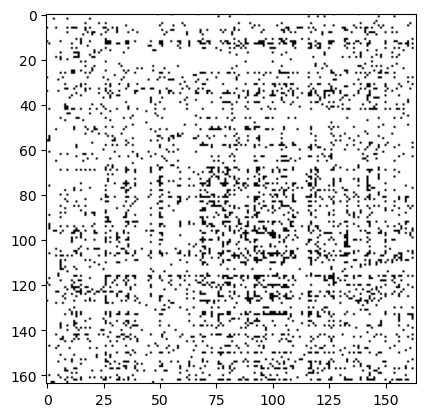

In [58]:
plt.imshow(A,cmap='Greys')
plt.show()

In [25]:
only_inh_df[['pre_soma_id','post_soma_id']]

,pre_soma_id,post_soma_id
0,269505,267006
1,262642,267006
2,267293,267006
3,301030,267006
4,264898,267006
...,...,...
77169,309508,309481
77170,305048,309481
77171,292670,271569
77284,309241,309266


In [4]:
A = xr.DataArray(np.random.randn(2, 3), dims=("preID", "postID"))
A

<xarray.DataArray (x: 2, y: 3)>
array([[ 0.14130884,  0.85652003, -1.47738701],
       [-0.13328619,  1.2309738 , -1.18581735]])
Dimensions without coordinates: x, y